In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('data/encoded_data.csv')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,1.957530,-0.119353,-0.381764,6,0,61,1,0,0,-1.174175,0
1,1,0,2,0.299164,-0.089844,-1.120780,6,0,61,0,0,0,-1.174175,0
2,2,0,2,1.747470,-0.030824,1.465775,3,0,36,1,1,0,-1.174175,0
3,1,0,2,0.122272,0.234761,-0.936026,6,0,61,0,0,1,-1.174175,0
4,2,0,2,-0.187290,-0.030824,1.096267,3,0,36,1,0,1,-1.174175,0


In [3]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [4]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

/home/shashank/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_predict = lr_model.predict(x_test)

In [6]:
print(accuracy_score(y_test, y_predict))

0.8471


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, max_depth=4, max_features=0.25) 
rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, max_features=0.25, n_estimators=300)

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=4)

In [9]:
scores

array([0.85048, 0.85048, 0.29896, 0.8504 ])

In [10]:
[
    {'n_estimators': 300, 'max_depth': 7, 'max_features': 0.25}, #array([0.85048, 0.8128 , 0.25608, 0.75512])
    {'n_estimators': 300, 'max_depth': 4, 'max_features': 0.25}, #array([0.85048, 0.85048, 0.29976, 0.8504 ])
    
]

[{'n_estimators': 300, 'max_depth': 7, 'max_features': 0.25},
 {'n_estimators': 300, 'max_depth': 4, 'max_features': 0.25}]

In [11]:
y_predict = rf_model.predict(x_test)
print(accuracy_score(y_test, y_predict))
pd.Series(y_predict).value_counts()

0.8477


0    10000
dtype: int64

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [19]:
y_predict = gb_model.predict(x_test)
print(accuracy_score(y_test, y_predict))

0.8474


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_model, X, y, cv=5)

In [21]:
scores

array([0.8505, 0.6151, 0.254 , 0.3774, 0.4309])

In [ ]:
#to get the importance of features
lr_importance = lr_model.coef_
rf_importance = rf_model.feature_importances_
gb_importance = gb_model.feature_importances_

In [ ]:

lr_importance[0]

array([-8.73990181e-01, -3.70154519e-01, -2.65391609e-01, -1.47270564e-01,
       -4.34710906e-02, -1.99175107e-02, -1.17561481e-02, -3.26354522e-04,
        9.16704041e-03,  9.67609728e-03,  1.20668181e-01,  2.91580345e-01,
        3.91805572e-01])

In [ ]:
rf_importance

array([0.0493713 , 0.01162602, 0.0016858 , 0.19325449, 0.12689666,
       0.14056922, 0.09228245, 0.14954698, 0.10884972, 0.01530081,
       0.01716689, 0.02194   , 0.07150966])

In [ ]:
gb_importance

array([0.00423847, 0.02499243, 0.00151209, 0.02483666, 0.06927332,
       0.00614936, 0.0012358 , 0.10979782, 0.6273867 , 0.04588395,
       0.02359189, 0.01075689, 0.0503446 ])

In [ ]:
#importance of features
rf_importance = pd.Series(rf_importance, index=X.columns)

In [ ]:
rf_importance = rf_importance * 100
rf_importance

num_passengers            4.937130
sales_channel             1.162602
trip_type                 0.168580
purchase_lead            19.325449
length_of_stay           12.689666
flight_hour              14.056922
flight_day                9.228245
route                    14.954698
booking_origin           10.884972
wants_extra_baggage       1.530081
wants_preferred_seat      1.716689
wants_in_flight_meals     2.194000
flight_duration           7.150966
dtype: float64

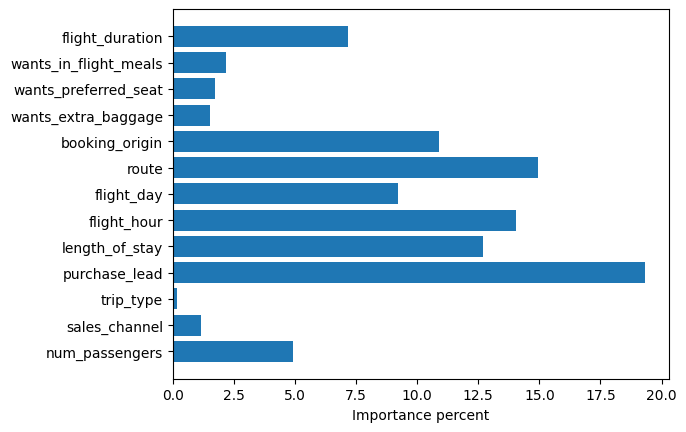

In [ ]:
import matplotlib.pyplot as plt
plt.barh(rf_importance.index, rf_importance)
plt.xlabel('Importance percent')
plt.show()

In [ ]:
lr_importance = pd.Series(lr_importance[0], index=X.columns)
lr_importance

num_passengers          -0.873990
sales_channel           -0.370155
trip_type               -0.265392
purchase_lead           -0.147271
length_of_stay          -0.043471
flight_hour             -0.019918
flight_day              -0.011756
route                   -0.000326
booking_origin           0.009167
wants_extra_baggage      0.009676
wants_preferred_seat     0.120668
wants_in_flight_meals    0.291580
flight_duration          0.391806
dtype: float64

<BarContainer object of 13 artists>

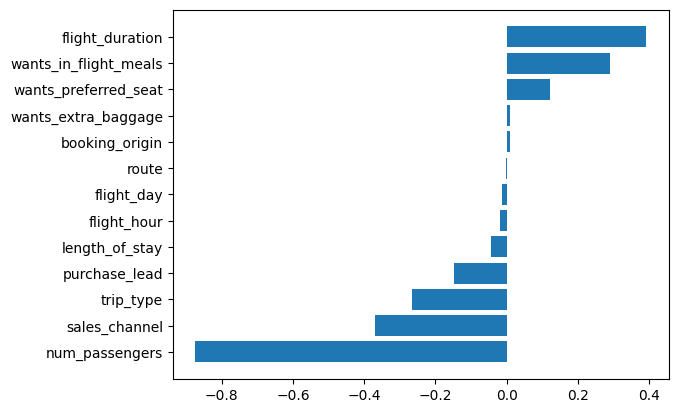

In [ ]:
plt.barh(lr_importance.index, lr_importance)